## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

df = pd.read_csv("/content/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [8]:
mean = df.mean()
var = df.var()
pd.DataFrame([mean,var], index=["Mean","Variance"])
# print(f"Mean: {mean}\nVariance: {var}")

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
Mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
Variance,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

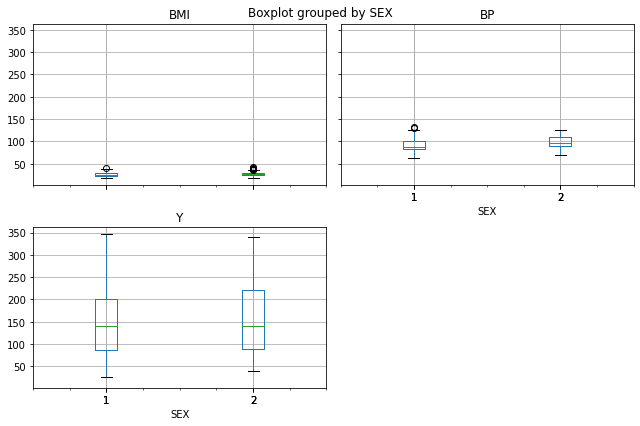

In [29]:
df.boxplot(["BMI","BP","Y"], by="SEX", figsize=(9,6))
plt.tight_layout()
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e775d6a90>,
      dtype=object)

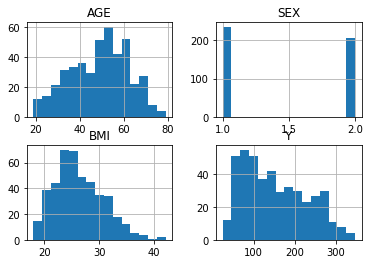

In [30]:
df.hist(['AGE','SEX','BMI','Y'], bins=15)


Distributions

---
Age, MBI, Y - Normal
Sex - Discrete 


### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [36]:
np.corrcoef(df)
# np.correlate(df)

array([[1.        , 0.87049182, 0.99506464, ..., 0.98873613, 0.96987563,
        0.74999453],
       [0.87049182, 1.        , 0.88678014, ..., 0.91819969, 0.82241394,
        0.96806331],
       [0.99506464, 0.88678014, 1.        , ..., 0.99062973, 0.95479306,
        0.77119166],
       ...,
       [0.98873613, 0.91819969, 0.99062973, ..., 1.        , 0.94678593,
        0.81902411],
       [0.96987563, 0.82241394, 0.95479306, ..., 0.94678593, 1.        ,
        0.72012767],
       [0.74999453, 0.96806331, 0.77119166, ..., 0.81902411, 0.72012767,
        1.        ]])

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

1. Choosing between measures of dispersion or central tendency by looking at outliers

---

> Box-Whiskers Plot

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


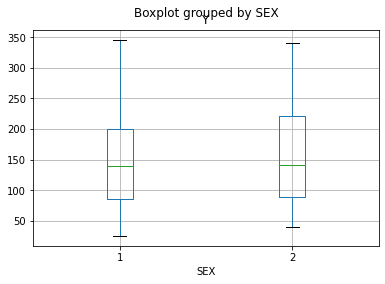

In [39]:
df.boxplot(['Y'], by='SEX')

In [44]:
# Using Mean

df.groupby('SEX').aggregate({ "AGE": "mean", "BMI": "mean", "BP": "mean", "Y": "mean" })

,AGE,BMI,BP,Y
SEX,,,,
1,46.382979,26.010638,91.521957,149.021277
2,50.942029,26.790338,98.194783,155.666667


In [55]:
df.loc[[],['Y']]

,Y


**Method 1:** Using Student t-test

In [56]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


*Answer* From the above findings, the p-value shows that the degree of diabetes progression is somewhat similar in both sexes

**Method 2:** Using confidence interval

In [58]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [59]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, 1st gender Y measure: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd gender Y measure: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st gender Y measure: 141.87..156.17, 2nd gender Y measure: 147.79..163.55
Conf=0.90, 1st gender Y measure: 140.84..157.20, 2nd gender Y measure: 146.66..164.68
Conf=0.95, 1st gender Y measure: 139.27..158.78, 2nd gender Y measure: 144.92..166.42


As observed, there is some degree of overlap in the Y per condifence level